# Malaria Detection using Malaria Datasets

## The Data
The dataset contains 2 folders - Parasitized(Infected) - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

# Visualizing the Data

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Malaria Datasets',
 'Malaria Detector.ipynb',
 'malaria_detector.h5']

In [3]:
my_data_dir = 'Malaria Datasets\\cell_images'

In [4]:
data_dir = os.listdir(my_data_dir)
data_dir

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

### Visualize cell image

In [7]:
print('parasitized: ', os.listdir(test_path+'parasitized')[0])
print('uninfected: ', os.listdir(test_path+'uninfected')[0])

parasitized:  C100P61ThinF_IMG_20150918_144348_cell_144.png
uninfected:  C100P61ThinF_IMG_20150918_144104_cell_34.png


In [8]:
para_cell = test_path+'parasitized'+'\\C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [9]:
para_cell

'Malaria Datasets\\cell_images\\test\\parasitized\\C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [10]:
para_img = imread(para_cell)

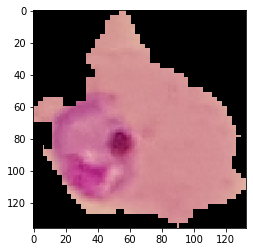

In [11]:
plt.imshow(para_img)

In [12]:
uninfected_cell = test_path+'uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [14]:
uninfected_img = imread(uninfected_cell)

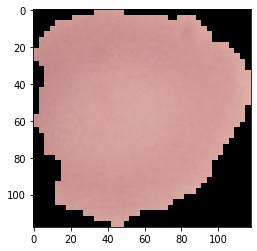

In [15]:
plt.imshow(uninfected_img)

### Check how many images there are.

In [16]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [17]:
len(os.listdir(train_path+'\\uninfected'))

12480

### Explore the Shape of cell-images

In [18]:
print(para_img.shape)
print(uninfected_img.shape)

(136, 133, 3)
(118, 118, 3)


In [19]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'\\uninfected'):
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [20]:
print('height: ',dim1[:10])
print('width: ',dim2[:10])

height:  [118, 172, 130, 163, 172, 139, 151, 160, 145, 127]
width:  [118, 145, 151, 145, 139, 136, 160, 121, 142, 121]


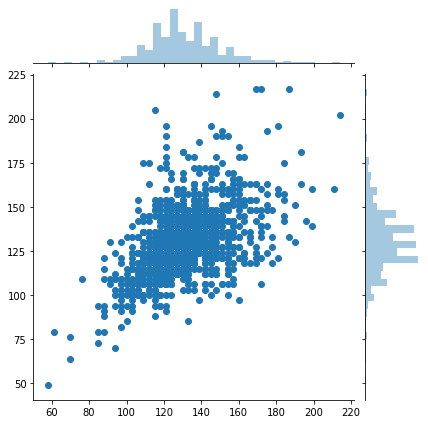

In [21]:
sns.jointplot(dim1, dim2)

In [22]:
np.mean(dim1)

130.92538461538462

In [23]:
np.mean(dim2)

130.75

In [24]:
image_shape = (130, 130, 3)

## Preparing the Data for the Model

### Image Manipulation
Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
#help(ImageDataGenerator)

In [27]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

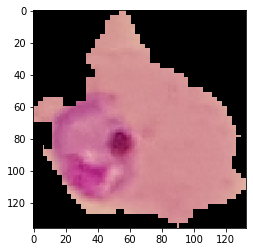

In [28]:
plt.imshow(para_img)

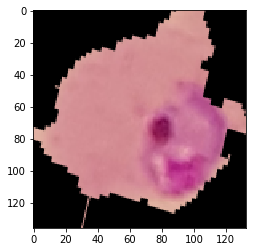

In [29]:
plt.imshow(image_gen.random_transform(para_img))

## Generating many manipulated images from a directory

Image folder structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Dropout, Flatten

Rules for selecting convolutional neural network hyperparameters:

https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

In [36]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),
                 input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

## Early Stopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [42]:
#help(image_gen.flow_from_directory)

In [41]:
image_shape[:2]

(130, 130)

In [42]:
batch_size = 16

In [43]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [44]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [45]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 1065s 683ms/step - loss: 0.5030 - accuracy: 0.7407 - val_loss: 0.2316 - val_accuracy: 0.9208
Epoch 2/20
1560/1560 [==============================] - 835s 535ms/step - loss: 0.1954 - accuracy: 0.9379 - val_loss: 0.1732 - val_accuracy: 0.9412
Epoch 3/20
1560/1560 [==============================] - 864s 554ms/step - loss: 0.1704 - accuracy: 0.9455 - val_loss: 0.1679 - val_accuracy: 0.9419
Epoch 4/20
1560/1560 [==============================] - 786s 504ms/step - loss: 0.1617 - accuracy: 0.9495 - val_loss: 0.1598 - val_accuracy: 0.9462
Epoch 5/20
1560/1560 [==============================] - 846s 543ms/step - loss: 0.1599 - accuracy: 0.9480 - val_loss: 0.1594 - val_accuracy: 0.9500
Epoch 6/20
1560/1560 [==============================] - 827s 530ms/step - loss: 0.1530 - accuracy: 0.9500 - val_loss: 0.1475 - val_accuracy: 0.9500
Epoch 7/20
1560/1560 [==============================] - 787s 505ms/step - loss: 0.1514 - accuracy: 0.9499 - val

## Save the Model

In [51]:
model.save('malaria_detector.h5')

In [33]:
from tensorflow.keras.models import load_model
saved_model = load_model('malaria_detector.h5')

## Evaluating the Model

In [35]:
#losses = pd.DataFrame(saved_model.history.history)

In [ ]:
losses[['loss','val_loss']].plot()

In [69]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [37]:
saved_model.metrics_names

['loss', 'accuracy']

In [47]:
saved_model.evaluate_generator(test_image_gen)

[0.1488298970393185, 0.9480769]

In [48]:
from tensorflow.keras.preprocessing import image

In [50]:
pred_probabilities = saved_model.predict_generator(test_image_gen)

In [51]:
pred_probabilities

array([[9.5725060e-05],
       [8.5324049e-05],
       [5.5402517e-05],
       ...,
       [9.3970549e-01],
       [9.7151738e-01],
       [9.8017782e-01]], dtype=float32)

In [52]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [70]:
### Here pred_probabilities return continuous value
### let's predict the % want to guess that will predict better output

In [53]:
predictions = pred_probabilities > 0.5

In [54]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [57]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1227,   73],
       [  54, 1246]], dtype=int64)

# Predicting on an Image

In [58]:
# Your file path will be different!
para_cell

'Malaria Datasets\\cell_images\\test\\parasitized\\C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [59]:
my_image = image.load_img(para_cell,target_size=image_shape)

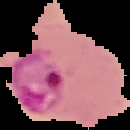

In [60]:
my_image

In [61]:
type(my_image)

PIL.Image.Image

In [62]:
my_image = image.img_to_array(my_image)

In [63]:
type(my_image)

numpy.ndarray

In [64]:
my_image.shape

(130, 130, 3)

In [67]:
saved_model.predict(my_image)

array([[0.]], dtype=float32)

In [68]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}